# EV Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IMPORT_DATAFRAME_JSON_HDF5 import *

In [2]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

## Import jsons/hdf5

In [6]:
data = import_trasient_from_file("jsons/")
data = map_transients_to_PQ_data(data, "HDF5", 20, ['P'])

100% (1370 of 1370) |#####################| Elapsed Time: 0:00:16 Time: 0:00:16
100% (1882 of 1882) |#####################| Elapsed Time: 0:05:21 Time: 0:05:21


## Explore the data

This chapter should give a overview of the used dataset. Therefore step one is to study the header of the dataset. Here the column *'begin_timestamp_float'* can be used as a index, make our're events easier to find and to compare with other data sources. 

In [7]:
length = len(data)
print("Number of data points: {}".format(length))
data.head(1)

Number of data points: 1882


,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient,P
begin_timestamp_float,,,,,,,,,,
1.491027e+09,701,01-04-2017_08:01:41_529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",245806.997513,"[105.77301788330078, 104.60313415527344, 105.3..."


In [8]:
transient_overview = pd.read_csv('transientlist.csv', sep=',', header=None)
transient_overview[0] = transient_overview[0].apply(convert_to_datetime)
len(transient_overview)

# output: 1370

1370

In [9]:
transient_overview.sort_values(0).head(1)

,0,1,2,3
733,2017-01-04 08:01:41.528330,7681,[2],26.198


In [10]:
data.sort_values('begin_timestamp_string').head(1)

,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient,P
begin_timestamp_float,,,,,,,,,,
1.491027e+09,701,01-04-2017_08:01:41_529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",245806.997513,"[105.77301788330078, 104.60313415527344, 105.3..."


## Preprossing Data Seb

<IPython.core.display.Javascript object>


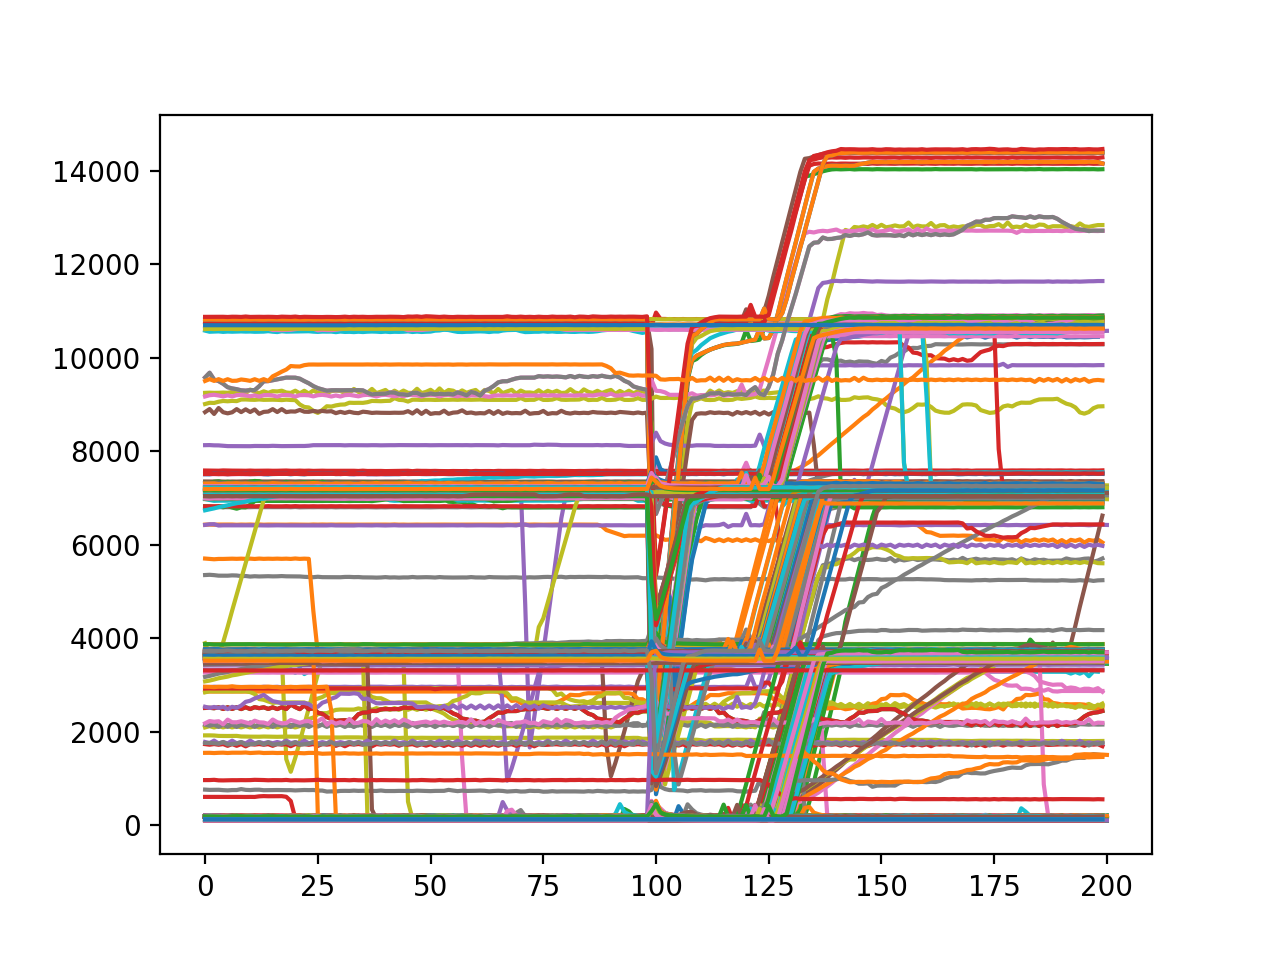

In [12]:
for a in range(0, len(data)):
    plt.plot(data.iloc[a]['P'])
    

data['charging_status']=0
data['P_mean']=0
data['P_delta'] = 0
data['P_Plugin']=0
data['P_Unplug'] = 0
for row in range(0, len(data)):
    # Getting the mean power before during and after the timestamp (-T, T)
    # Defining charging_status as 1 for avg(P)>300W else 0 and writing it to a new column
    P_mean = sum(data.iloc[row]['P']) / float(len(data.iloc[row]['P']))
    data.set_value(data.index[row],'P_mean', P_mean)
    if P_mean>300:
        data.set_value(data.index[row],'charging_status',int(1))
    else:
       data.set_value(data.index[row],'charging_status', int(0))
     # Defining if a new car is plugged in during the appearance of the transient
    P_mean_before = sum((data.iloc[row]['P'])[:10]) / float(len((data.iloc[row]['P'])[:10])) 
    P_mean_after = sum((data.iloc[row]['P'])[(len(data.iloc[row]['P'])-10):]) / float(len((data.iloc[row]['P'])[(len(data.iloc[row]['P'])-10):])) 
    P_delta = P_mean_after - P_mean_before
    data.set_value(data.index[row],'P_delta',P_delta)
    if P_delta > 2000:
        data.set_value(data.index[row],'P_Plugin',int(1))
    elif P_delta < -2000:
        data.set_value(data.index[row],'P_Unplug',int(1))

In [13]:
data.head()

,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient,P,charging_status,P_mean,P_delta,P_Plugin,P_Unplug
begin_timestamp_float,,,,,,,,,,,,,,,
1.491027e+09,701,01-04-2017_08:01:41_529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",2.458070e+05,"[105.77301788330078, 104.60313415527344, 105.3...",0,105,0,0,0
1.491027e+09,806,01-04-2017_08:14:53_521148,"[0.3013579845, 0.27552866940000004, 0.30145740...",2,"[0.732421875, 0.7171630859, 0.7476806641, 0.76...","[289.1282348633, 289.2579956055, 289.335845947...","[21.480, 3.592, 1.415]","[860, 1074, 1427]",1.951086e+05,"[105.6083755493164, 105.91771697998047, 105.88...",0,105,0,0,0
1.491073e+09,5717,01-04-2017_20:57:48_799036,"[-0.0624732189, -0.1910434365, 0.0152767645, -...",2,"[-1.2969970703, -1.2512207031, -1.2359619141, ...","[-292.2813720703, -292.3981628418, -292.618743...","[26.096, 4.280, 2.540]","[5769, 5892, 6032]",2.423178e+05,"[107.5003433227539, 107.1847915649414, 107.303...",0,106,-1,0,0
1.488462e+09,2750,02-03-2017_14:42:56_465712,"[-0.1300312473, 7.76288e-05, -0.0388483592, 0....",1,"[-2.6092529297000002, -2.6092529297000002, -2....","[0.1690305471, -0.1430258453, -0.3770681620000...","[58.447, 13.698, 33.141]","[2760, 2843, 3400]",-2.846197e+06,"[3704.182861328125, 3712.759521484375, 3715.73...",1,4850,3551,1,0
1.488462e+09,9697,02-03-2017_14:45:31_804547,"[0.142554611, 0.0336101092, 0.1024524048000000...",3,"[-31.0211181641, -31.1126708984, -31.127929687...","[-297.951385498, -297.7366638184, -297.6964111...","[40.280, 21.233, 2.845]","[9709, 9791, 9874]",-1.692315e+06,"[7219.86328125, 7217.51416015625, 7218.6166992...",1,8313,3503,1,0


## Preprossing Data

The next step is to Preprocessing the Data. In this present Case it's possible that the transient detect only on one phase, two phases or all phases. Therefore it's important to ascertain how often one of the three events is detecteted. Then we can create seperate Dataframe for this three events.

In [14]:
%%time
from collections import Counter
#documentation : https://docs.python.org/2/library/collections.html

# put all timestamps to a list
# and create a dict with Counter() to get a timestamp as key and a value how often we can find this timestamp
timestamps = data.index.tolist()
counter_timestamps = Counter()
for timestamp in timestamps:
    counter_timestamps[timestamp] += 1

# create a series from the counter object, that we can handle better the information
counter_timestamps_series = pd.Series(counter_timestamps)
data_point_num = len(counter_timestamps_series)
data_points_per_phase = counter_timestamps_series.value_counts()

# print all the result
print("All events: {}".format(data_point_num))
print("Events with one phase: {}".format(data_points_per_phase[1]))
print("Events with two phases: {}".format(data_points_per_phase[2]))
print("Events with three phases: {}".format(data_points_per_phase[3]))

All events: 1568
Events with one phase: 1305
Events with two phases: 212
Events with three phases: 51
CPU times: user 4.52 ms, sys: 1.11 ms, total: 5.63 ms
Wall time: 6.1 ms


In [36]:
from collections import Counter
#documentation : https://docs.python.org/2/library/collections.html

def seperate_transients(input_df):
    # put all timestamps to a list
    # and create a dict with Counter() to get a timestamp as key and a value how often we can find this timestamp
    timestamps = data.index.tolist()
    # create a counter object
    counter_timestamps = Counter()
    # count how often one Timestamp is in the list
    for timestamp in timestamps:
        counter_timestamps[timestamp] += 1
 
    # create a series from the counter object, that we can handle better the information    
    counter_timestamps_series = pd.Series(counter_timestamps)
    
    # create three new df
    # take the header from the input data
    header = input_df.dtypes.index
    
    events_from_outside = pd.DataFrame(columns=header)
    one_phase_df = pd.DataFrame(columns=header)
    two_phase_df = pd.DataFrame(columns=header)
    three_phase_df = pd.DataFrame(columns=header)
    
    for index, row in input_df.iterrows():
        # ev_start 1 mean that ev start charging
        ev_start = row['P_Plugin']
        # ev_stop 1 mean that ev stop charging
        ev_stop = row['P_Unplug']
        
        # seperate events from outside and charging events
        if(ev_start == 0 & ev_stop == 0):
            # events from outside
            events_from_outside = events_from_outside.append(row)
        else:
            # charging events
            num_phase = counter_timestamps_series[index]
            # Events with one phase
            if(num_phase == 1):
                one_phase_df = one_phase_df.append(row)
            # Events with two phases
            elif(num_phase == 2):
                two_phase_df = two_phase_df.append(row)
            # Events with three phases
            elif(num_phase == 3):
                three_phase_df = three_phase_df.append(row)   
    # take the dtypes from the input header
    dtypes = dict(input_df.dtypes)
    one_phase_df = one_phase_df.astype(dtype=dtypes)
    two_phase_df = two_phase_df.astype(dtype=dtypes)
    three_phase_df = three_phase_df.astype(dtype=dtypes)
    
    return [events_from_outside, one_phase_df, two_phase_df, three_phase_df]

In [37]:
%time events_from_outside, transients_1_phase, transients_2_phase, transients_3_phase = seperate_transients(data)

CPU times: user 9.05 s, sys: 25.5 ms, total: 9.08 s
Wall time: 9.09 s


In [42]:
len(transients_1_phase)

252

In [43]:
len(transients_2_phase)

170

In [44]:
len(transients_3_phase)

63

In [41]:
len(events_from_outside)

1397

### Create Feature Dataframe from exist features

The Problem with time series is, that they are high dimensional. Therefore it's important to extract features from this time series to reduce the dimensions of the data. So the next step is to preprocessing our data, that we can extract features from this Dataframe. We will create a Dataframe for the current/voltage signals.

In [45]:
def squeeze_nan(x):
    # get original column names
    original_columns = x.index.tolist()
    # drop all nan values
    squeezed = x.dropna()
    # create new index
    squeezed.index = [original_columns[n] for n in range(squeezed.count())]
    # return new Series with all nan values at the last column
    return squeezed.reindex(original_columns, fill_value=np.nan)

def create_feature_df(input_data):
    # preprocessing input data
    # drop all unnecessary columns
    input_data = input_data.drop(['begin_index','begin_timestamp_string',
                                  'filtered_signal','raw_signal_current',
                                  'raw_signal_voltage'], 1)
    # seperate peaks
    input_data[['peak_1','peak_2','peak_3']] = input_data['three_first_peaks'].apply(pd.Series)
    # seperate peak index
    input_data[['p_index_1','p_index_2','p_index_3']] = input_data['three_first_peaks_index'].apply(pd.Series)
    
    # cleanup dataframe
    input_data = input_data.drop(['three_first_peaks','three_first_peaks_index'], 1)
    
    index = input_data.index.unique()
    columns = ['peak_1_1','peak_2_1','peak_3_1',
               'peak_1_2','peak_2_2','peak_3_2',
               'peak_1_3','peak_2_3','peak_3_3']
    feature_df = pd.DataFrame(np.nan, index=index, columns=columns)
        
    for index, row in input_data.iterrows():
        phase_num = row['phase_num']
        # put to phase 1
        if(phase_num == 1):
            feature_df.set_value(
                index,
                ['peak_1_1','peak_2_1','peak_3_1'],
                [row['peak_1'],row['peak_2'],row['peak_3']]
                )
        # put to phase 2
        elif(phase_num == 2):
            feature_df.set_value(
                index,
                ['peak_1_2','peak_2_2','peak_3_2'],
                [row['peak_1'],row['peak_2'],row['peak_3']]
                )
        # put to phase 3
        elif(phase_num == 3):
            feature_df.set_value(
                index,
                ['peak_1_3','peak_2_3','peak_3_3'],
                [row['peak_1'],row['peak_2'],row['peak_3']]
                )
        # Case 4: All undefine Cases
        else:
            print('Error: create_feature_dataframe')
    
    return(feature_df)

## Feature for one phase events

In [63]:
%time feature_df_with_nan_1 = create_feature_df(transients_1_phase)

feature_df_with_nan_sort_1 = feature_df_with_nan_1.apply(squeeze_nan, axis=1)
feature_df_1_phase = feature_df_with_nan_sort_1.dropna(axis=1)
feature_df_1_phase = feature_df_1_phase.apply(pd.to_numeric)

CPU times: user 230 ms, sys: 6.92 ms, total: 236 ms
Wall time: 233 ms


In [64]:
feature_df_1_phase.head()

,peak_1_1,peak_2_1,peak_3_1
1.488462e+09,58.447,13.698,33.141
1.488462e+09,40.280,21.233,2.845
1.488462e+09,20.426,8.952,1.933
1.488469e+09,40.473,17.702,7.373
1.488521e+09,98.945,29.449,52.133


<IPython.core.display.Javascript object>


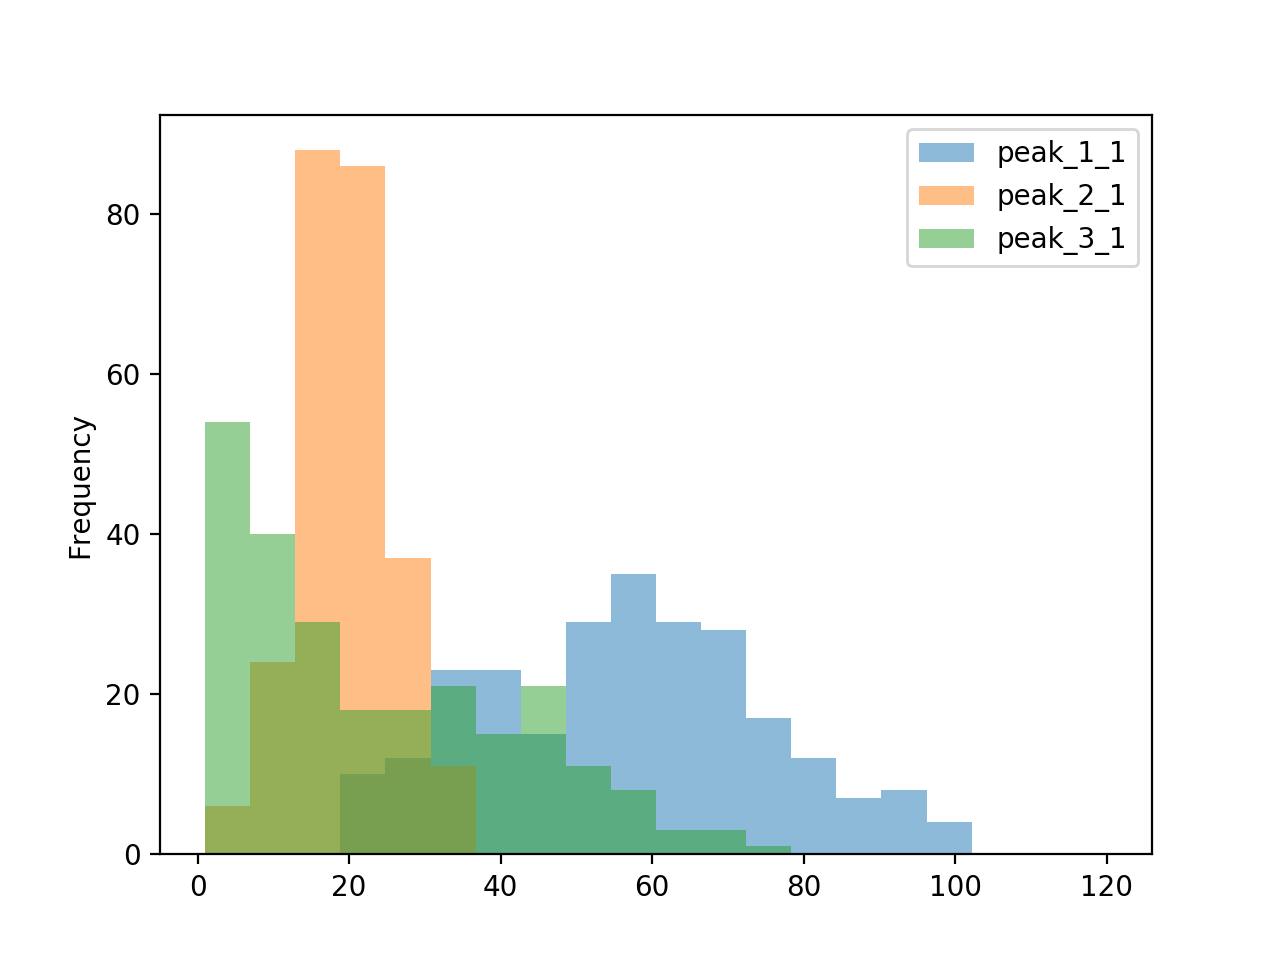

In [65]:
feature_df_1_phase.plot.hist(alpha=0.5, bins=20, range=[1, 120])

## Feature for two phase events

In [66]:
%time feature_df_with_nan_2 = create_feature_df(transients_2_phase)

feature_df_with_nan_sort_2 = feature_df_with_nan_2.apply(squeeze_nan, axis=1)
feature_df_1_phase = feature_df_with_nan_sort_2.dropna(axis=1)
feature_df_1_phase = feature_df_1_phase.apply(pd.to_numeric)

CPU times: user 160 ms, sys: 7.81 ms, total: 168 ms
Wall time: 163 ms


In [68]:
feature_df_with_nan_2.head()

,peak_1_1,peak_2_1,peak_3_1,peak_1_2,peak_2_2,peak_3_2,peak_1_3,peak_2_3,peak_3_3
1.488517e+09,76.325,22.823,0.918,25.445,20.896,17.552,NaN,NaN,NaN
1.488518e+09,59.616,13.444,32.675,26.159,14.247,12.483,NaN,NaN,NaN
1.488532e+09,NaN,NaN,NaN,24.083,6.267,13.547,70.485,22.211,37.873
1.491204e+09,NaN,NaN,NaN,70.632,40.362,16.938,33.206,12.824,7.293
1.491220e+09,NaN,NaN,NaN,66.281,14.844,52.967,20.802,11.931,16.964


In [67]:
feature_df_1_phase.head()

,peak_1_1,peak_2_1,peak_3_1,peak_1_2,peak_2_2,peak_3_2
1.488517e+09,76.325,22.823,0.918,25.445,20.896,17.552
1.488518e+09,59.616,13.444,32.675,26.159,14.247,12.483
1.488532e+09,24.083,6.267,13.547,70.485,22.211,37.873
1.491204e+09,70.632,40.362,16.938,33.206,12.824,7.293
1.491220e+09,66.281,14.844,52.967,20.802,11.931,16.964


## Feature for three phase events

In [70]:
%time feature_df_with_nan_3 = create_feature_df(transients_3_phase)

feature_df_with_nan_sort_3 = feature_df_with_nan_3.apply(squeeze_nan, axis=1)
feature_df_3_phase = feature_df_with_nan_sort_3.dropna(axis=1)
feature_df_3_phase = feature_df_3_phase.apply(pd.to_numeric)

CPU times: user 67.3 ms, sys: 2.96 ms, total: 70.3 ms
Wall time: 68.6 ms


In [72]:
feature_df_3_phase.head()

,peak_1_1,peak_2_1,peak_3_1,peak_1_2,peak_2_2,peak_3_2,peak_1_3,peak_2_3,peak_3_3
1.491395e+09,22.142,7.970,18.781,24.063,7.688,16.598,69.691,21.316,45.636
1.488965e+09,23.521,9.473,20.440,25.649,9.155,21.862,73.768,24.713,60.850
1.489051e+09,22.261,5.339,15.579,95.814,26.040,65.944,41.611,10.809,31.085
1.489121e+09,22.418,13.847,7.541,69.462,26.428,18.992,31.916,9.669,7.767
1.491988e+09,31.648,11.156,5.396,30.688,11.263,7.824,84.067,15.393,13.649


<IPython.core.display.Javascript object>


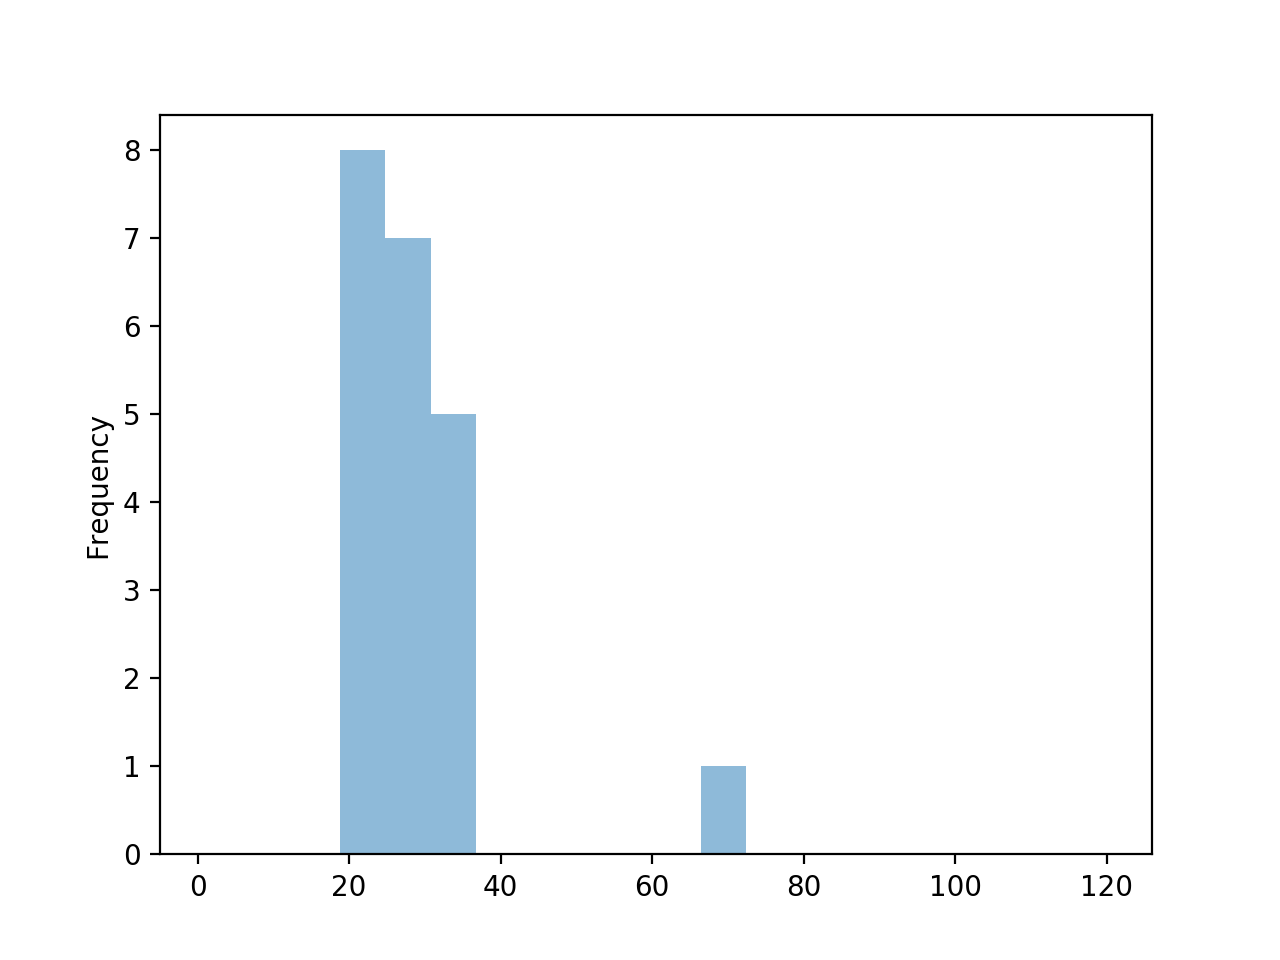

In [73]:
%matplotlib notebook
feature_df_3_phase.peak_1_1.plot.hist(alpha=0.5, bins=20, range=[1, 120])

# Spielen

In [177]:
Z = linkage(feature_df, 'ward')

In [178]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(feature_df))
c

0.68034015253242963

In [183]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

<IPython.core.display.Javascript object>


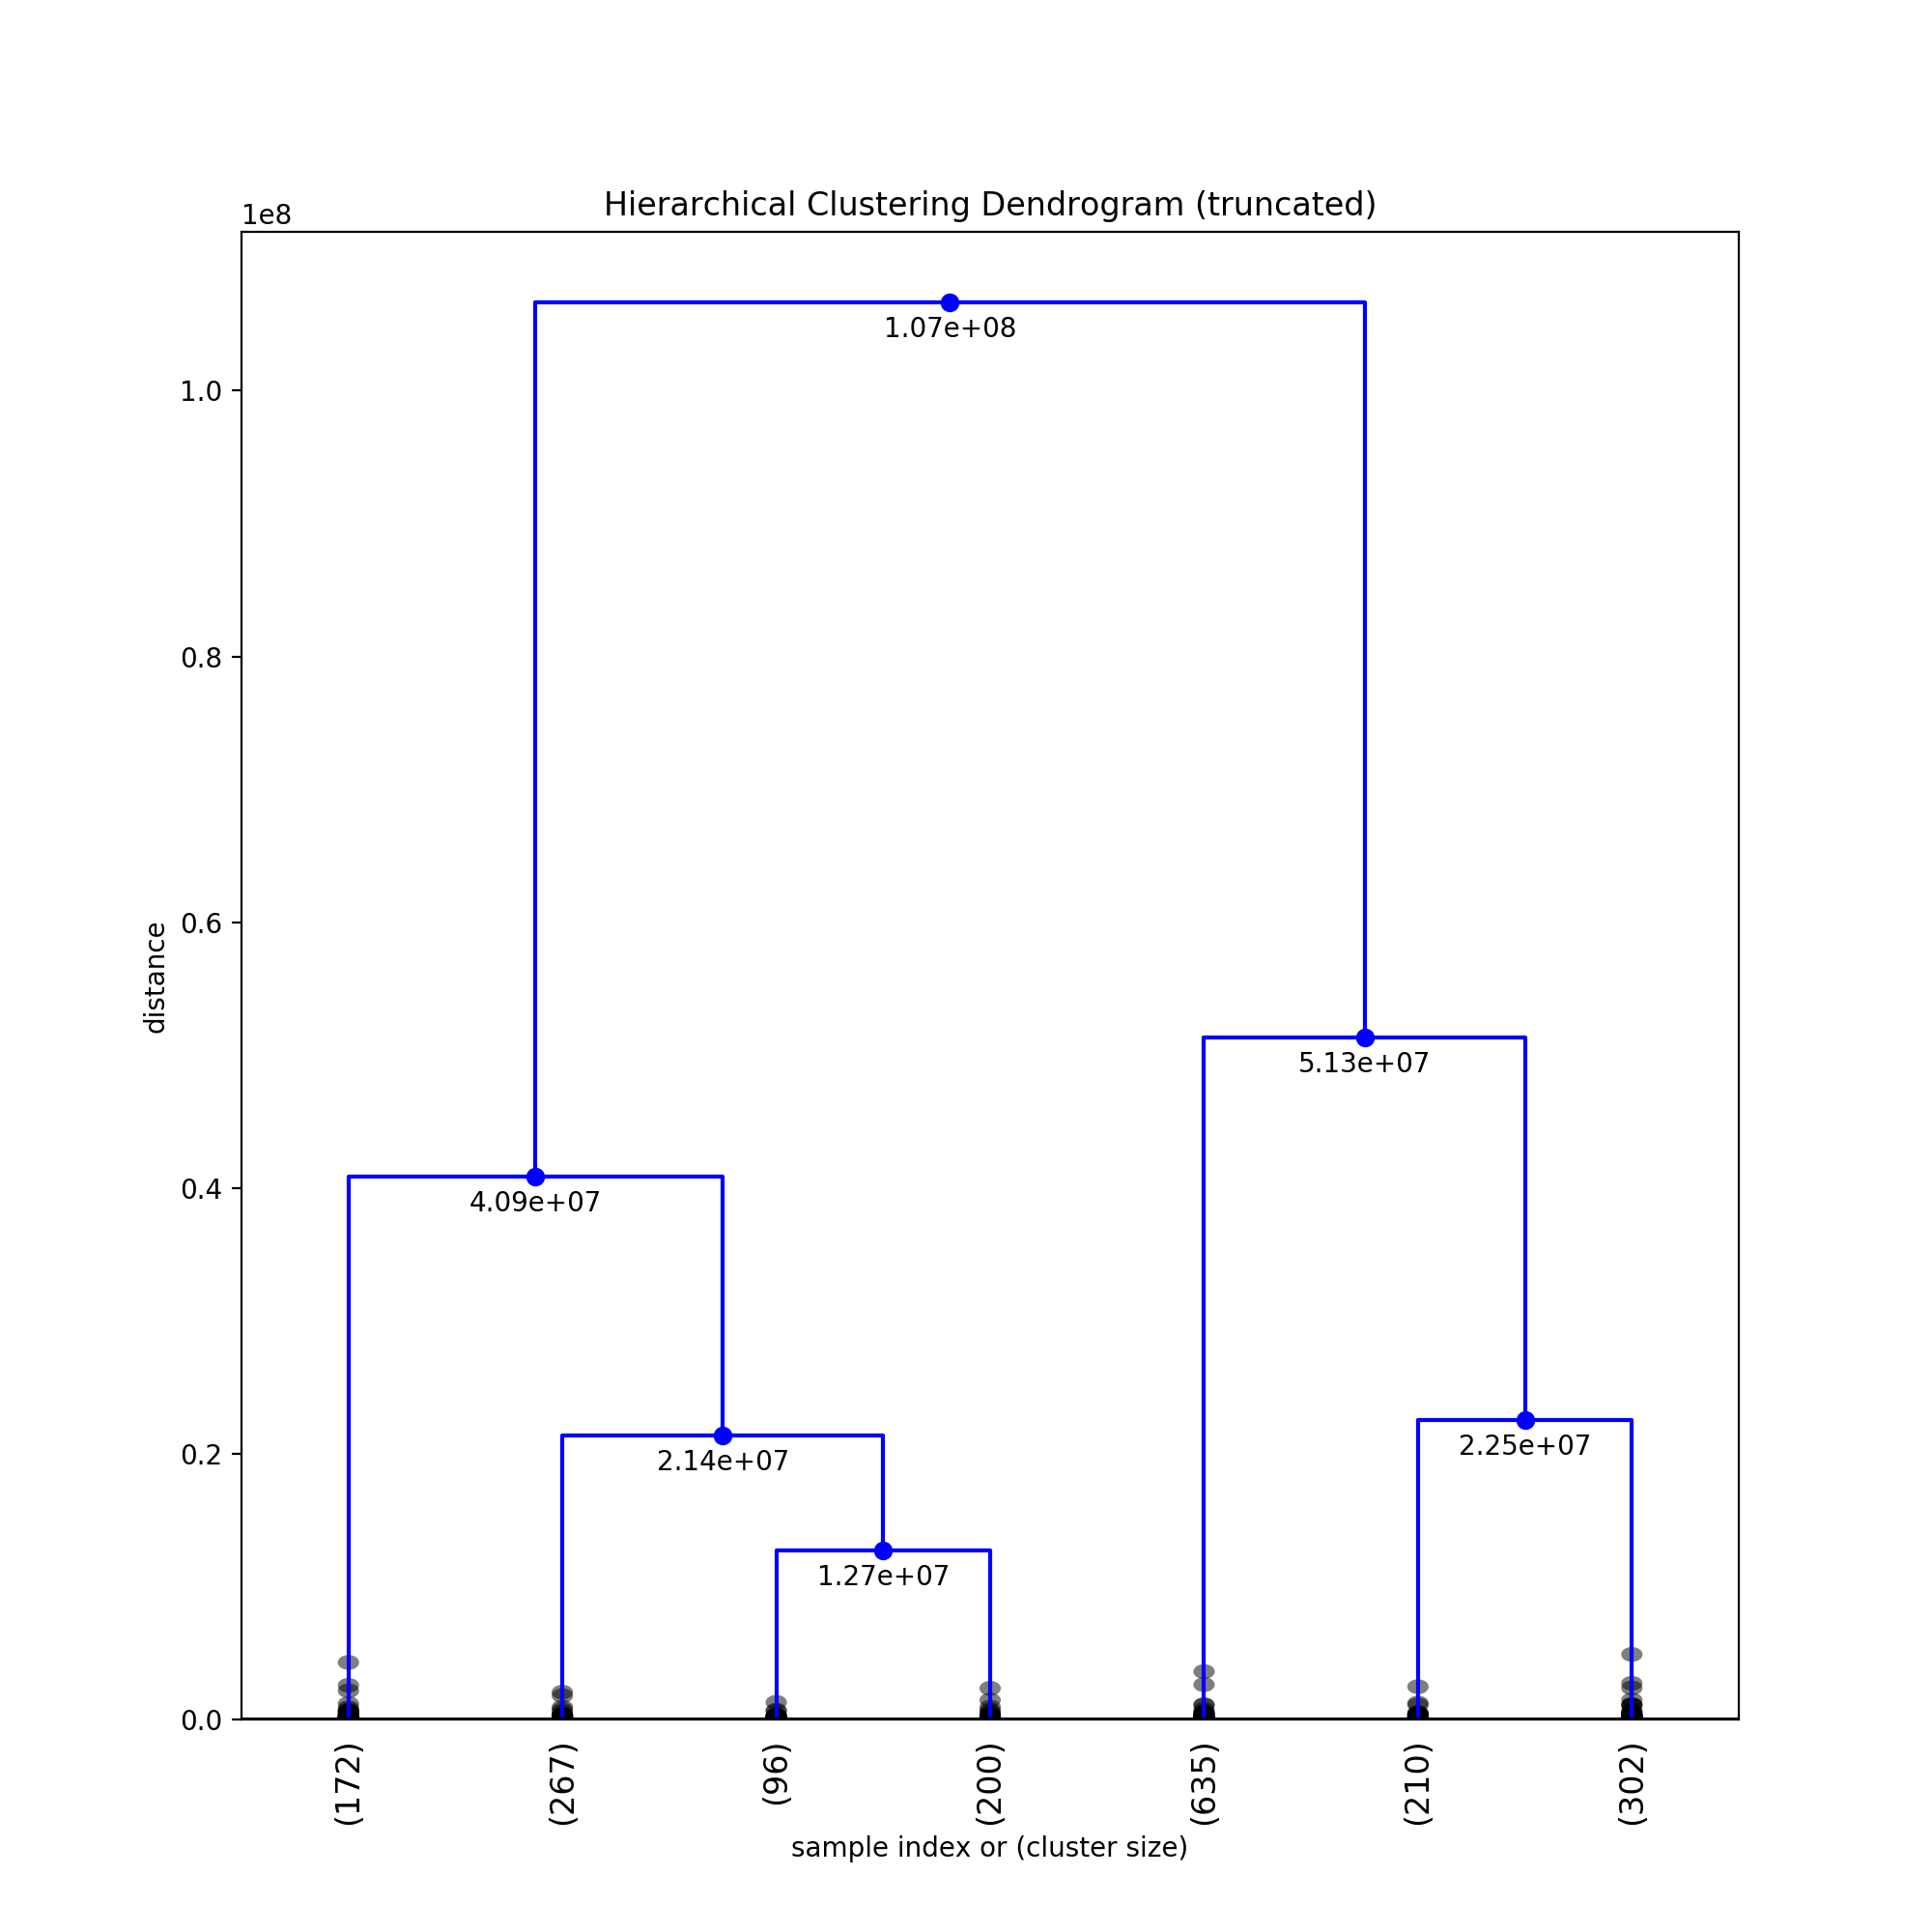

In [191]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=7,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=16,
)
plt.show()

In [8]:
# create trasient data frame
raw_signal_current = data["raw_signal_current"]
raw_signal_voltage = data["raw_signal_voltage"]

# create dataframes
# on row contains on time series
# column is time or dimension
df_raw_signal_current = pd.DataFrame([x for x in raw_signal_current])
df_raw_signal_voltage = pd.DataFrame([x for x in raw_signal_voltage])

In [9]:
df_raw_signal_current.head(1)

,0,1,2,3,4,5,6,7,8,9,...,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025
0,0.656128,0.701904,0.762939,0.701904,0.686646,0.762939,0.732422,0.686646,0.717163,0.686646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_raw_signal_voltage.head(1)

,0,1,2,3,4,5,6,7,8,9,...,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025
0,289.647278,289.699188,289.802979,289.828949,289.932739,290.04953,290.10144,290.270111,290.373932,290.490723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clustering

### Extract Features Voltage (mit tsfresh)

Quelle Bild:
https://tsfresh.readthedocs.io/en/latest/_images/feature_extraction_process_20160815_mc_1.png

In [11]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import FeatureExtractionSettings

extraction_settings = FeatureExtractionSettings()
extraction_settings.IMPUTE = impute    # Fill in Infs and NaNs

# transpose since tsfresh reads times series data column-wise, not row-wise
df_raw_signal_voltage_t = df_raw_signal_voltage.copy().transpose()
df_raw_signal_voltage_t_cut = df_raw_signal_voltage_t[:100]

print(df_raw_signal_voltage_t_cut.shape)
len(df_raw_signal_voltage_t_cut.columns)

In [18]:
# rearrange voltage column-wise, not row-wise

master_df = pd.DataFrame(df_raw_signal_voltage_t_cut[0])
master_df['id'] = 0

bar = progressbar.ProgressBar()

with progressbar.ProgressBar(max_value=len(df_raw_signal_voltage_t_cut.columns)) as bar:
    for i in range(1,500): #len(df_raw_signal_voltage_t.columns)
        signal_df = pd.DataFrame(df_raw_signal_voltage_t_cut[i])
        signal_df['id'] = i
        master_df = pd.DataFrame(np.vstack([master_df, signal_df]))
        bar.update(i)

100% (1882 of 1882) |#####################| Elapsed Time: 0:00:00 Time: 0:00:00


In [19]:
master_df.shape

(50000, 2)

In [20]:
new_master_df = master_df.dropna(how='any')
new_master_df.shape

(50000, 2)

In [21]:
%time X = extract_features(new_master_df, column_id=1, feature_extraction_settings=extraction_settings)

Feature Extraction: 100%|██████████| 500/500 [00:28<00:00, 17.29it/s]

CPU times: user 973 ms, sys: 186 ms, total: 1.16 s
Wall time: 29.1 s
